In [1]:
#https://www.kaggle.com/datasets/ivanhrek/uci-adult

# **Installing and Importing Packages**

In [2]:
#Installing the required libraries
# !pip install kagglehub
# !pip install pandas
# !pip install matplotlib
# !pip install scipy

In [3]:
#Importing packages
import kagglehub
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

c:\Users\icemo\Documents\University\Masters\Applied Machine Learning\ICS5110-Applied-Machine-Learning\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# **Downloading and Loading Dataset**

In [4]:
#Download the dataset
path = kagglehub.dataset_download("ivanhrek/uci-adult")

In [5]:
#Retrieving the path to the dataset
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        path = os.path.join(dirname, filename)

In [6]:
#Displaying the first 5 rows of the dataset
df = pd.read_csv(path)
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# **Dataset Exploration**

## Rows and Columns

In [7]:
#Get the number of rows and columns
print("Rows: ", df.shape[0])
print("Columns: ", df.shape[1])

Rows:  32561
Columns:  15


## Column Names

In [8]:
#Get the column names
print("Columns: ", df.columns.values)

Columns:  ['age' 'workclass' 'fnlwgt' 'education' 'education-num' 'marital-status'
 'occupation' 'relationship' 'race' 'sex' 'capital-gain' 'capital-loss'
 'hours-per-week' 'native-country' 'salary']


## Data Types

In [9]:
#Getting data types of each column
print(df.dtypes)

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object


## Unique Values and Numerical Ranges

In [10]:
#Getting all unique values in a column
for column in df.columns:
    uniqueValues = df[column].unique()
    
    #Check if column is numeric
    if df[column].dtype != 'int64' and df[column].dtype != 'float64':
        print(column, ":", uniqueValues)
        print("Number of categories: ", len(uniqueValues))
        print()
    else:
        #Print the range of the values
        print(column, ":", min(uniqueValues), "-", max(uniqueValues))
        print()

age : 17 - 90

workclass : ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
Number of categories:  9

fnlwgt : 12285 - 1484705

education : ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
Number of categories:  16

education-num : 1 - 16

marital-status : ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
Number of categories:  7

occupation : ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
Number of categories:  15

relationship : ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
Number of categories:  6

race : ['Wh

## Missing Values

In [11]:
#Checking for missing values (Value is set to ? in the dataset for missing values)
print(df.isin(['?']).sum())

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64


In [12]:
#Get number of rows without missing values
print("Rows without missing values: ", df.dropna().shape[0])

Rows without missing values:  32561


## Duplicate Rows

In [13]:
#Duplicate rows
print("Number of duplicate rows: ", df.duplicated().sum())

Number of duplicate rows:  24


## Checking Skewness

In [14]:
dfSkewness = df.copy()

#Removing duplicate rows
dfSkewness.drop_duplicates(inplace=True)

#Removing rows with missing values
dfSkewness = dfSkewness[dfSkewness != '?']

#Converting columns to numeric
for column in dfSkewness.columns:
    if dfSkewness[column].dtype == 'object':
        #Converting values to index
        dfSkewness[column], uniques = pd.factorize(dfSkewness[column])
        dfSkewness[column] = dfSkewness[column] + 1  

In [15]:
#Checking skewness of the data
print(dfSkewness.skew())

age                0.557663
workclass         -0.089160
fnlwgt             1.447703
education          1.231618
education-num     -0.309500
marital-status     2.155419
occupation         0.351007
relationship       0.775054
race               3.520308
sex                0.719449
capital-gain      11.949403
capital-loss       4.592702
hours-per-week     0.228759
native-country     5.117206
salary             1.211687
dtype: float64


## Getting Distributions

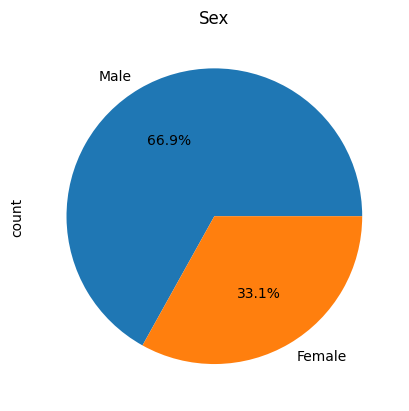

In [16]:
#Sex Pie Chart

#Displays the sex distribution in the dataset
df["sex"].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Sex")
plt.show()

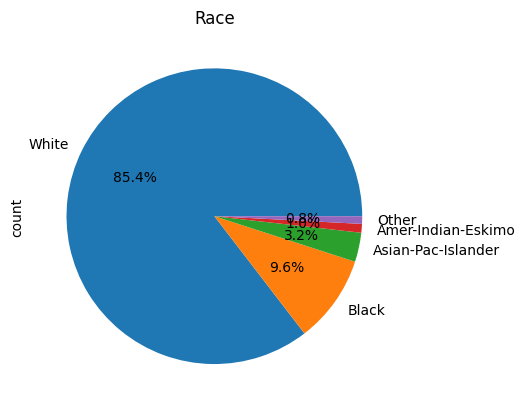

In [17]:
#Race Pie Chart

#Displays the race distribution in the dataset
df["race"].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Race")
plt.show()

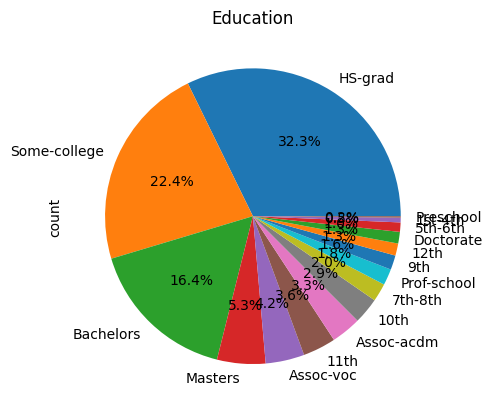

In [44]:
#Education Pie Chart

#Displays the education distribution in the dataset
df["education"].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Education")
plt.show()


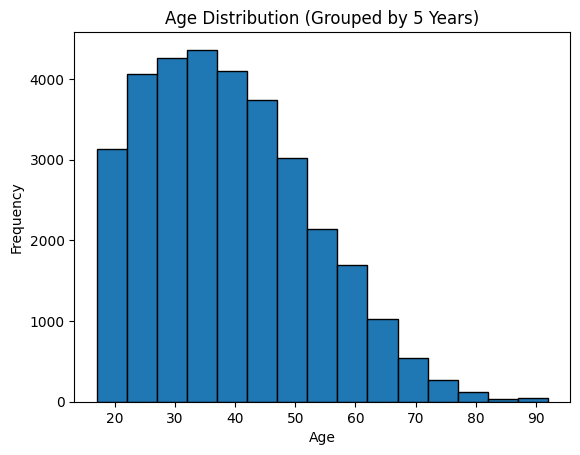

In [19]:
#Age Histogram

#Displays the age distribution in the dataset as line chart
df["age"].plot.hist(bins=range(df["age"].min(), df["age"].max() + 5, 5), edgecolor="black")
plt.title("Age Distribution (Grouped by 5 Years)")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


Text(0.5, 0, 'Country')

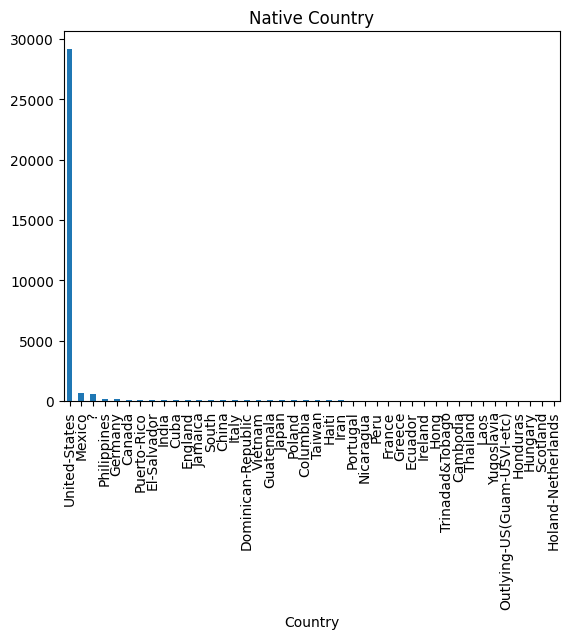

In [20]:
#Nationality Histogram

#Displays the nationality by frequency
df["native-country"].value_counts().plot.bar()
plt.title("Native Country")
plt.xlabel("Country")

# **Data Cleaning**

## Removing Duplicate Rows and Missing Values

In [21]:
dfCleaned = df.copy()

#Removing duplicate rows
dfCleaned.drop_duplicates(inplace=True)

# Replace '?' with NaN
dfCleaned = dfCleaned.replace('?', np.nan)

# Drop rows with any NaN values
dfCleaned = dfCleaned.dropna()

## Removing Country Column

United States takes such a large percentage of the data that even if we group the rest of the countries together, it will still be a very small percentage of the overall data. So, we will only keep rows with United States as the native country. Because of this, the country column will be dropped as it will only contain United States as the value.

In [22]:
# United-States takes such a large percentage of the data that even if we group the rest of the countries together,
# it will still be a very small percentage of the overall data. So, we will only keep rows with United States as the native country. Because of this,
# the country column will be dropped as it will only contain United States as the value.

#Keeping only rows with United States as native country
dfCleaned = dfCleaned[dfCleaned["native-country"] == "United-States"]

In [23]:
#Dropping the native country column
dfCleaned.drop(columns=["native-country"], inplace=True)

In [24]:
dfCleaned.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,<=50K


## Dropping the education column

Since the education and education number columns are related, we will drop the education column and keep the education number column. The reason for this is that the education number column is already in a numerical format and can be used directly in machine learning models,which means it may have an order of magnitude. 

In [25]:
#Dropping the education column
dfCleaned.drop(columns=["education"], inplace=True)

dfCleaned.head(5)

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,salary
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,<=50K
5,37,Private,284582,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,<=50K


## Grouping Age into Ranges (DECIDE AGE RANGES)

In [26]:
#Grouping age into bins
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90]
labels = ["0-20", "21-30", "31-40", "41-50", "51-60", "61-70", "71-80", "81-90"]
dfCleaned["age"] = pd.cut(dfCleaned["age"], bins=bins, labels=labels)
dfCleaned.head(5)

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,salary
0,31-40,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,<=50K
1,41-50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,<=50K
2,31-40,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,<=50K
3,51-60,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,<=50K
5,31-40,Private,284582,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,<=50K


## Normalising values with numerical values (DECIDE NORMALISATION TECHNIQUE - ZSCORE)

In [27]:
#Normalizing the data

columnsToNormalize = ["fnlwgt", "education-num", "capital-gain", "capital-loss", "hours-per-week"]

#Normalise between 0 and 1
for column in columnsToNormalize:
    dfCleaned[column] = (dfCleaned[column] - dfCleaned[column].min()) / (dfCleaned[column].max() - dfCleaned[column].min())

dfCleaned.head(5)

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,salary
0,31-40,State-gov,0.043338,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.02174,0.0,0.397959,<=50K
1,41-50,Self-emp-not-inc,0.047277,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.00000,0.0,0.122449,<=50K
2,31-40,Private,0.137244,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.00000,0.0,0.397959,<=50K
3,51-60,Private,0.150212,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.00000,0.0,0.397959,<=50K
5,31-40,Private,0.184109,0.866667,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.00000,0.0,0.397959,<=50K


## Cleaning String Values

In [28]:
#Converting string columns to full words, lower case and removing hyphens
#Converting columns to full words
#Define the mapping
workclass_mapping = {
    'State-gov': 'State Government',
    'Self-emp-not-inc': 'Self Employed (not incorporated)',
    'Private': 'Private Sector',
    'Federal-gov': 'Federal Government',
    'Local-gov': 'Local Government',
    'Self-emp-inc': 'Self-employed (incorporated)',
    'Without-pay': 'Unpaid',
    'Never-worked': 'Never Worked'
}

# Replace values using the mapping
dfCleaned['workclass'] = dfCleaned['workclass'].replace(workclass_mapping)

In [29]:
# Mapping dictionary
marital_status_mapping = {
    'Never-married': 'Never Married',
    'Married-civ-spouse': 'Married (Civil Spouse)',
    'Divorced': 'Divorced',
    'Married-spouse-absent': 'Married (Spouse Absent)',
    'Separated': 'Separated',
    'Married-AF-spouse': 'Married (Armed Forces Spouse)',
    'Widowed': 'Widowed'
}

# Replace values using the mapping
dfCleaned['marital-status'] = dfCleaned['marital-status'].replace(marital_status_mapping)

In [30]:
occupation_mapping = {
    'Adm-clerical': 'Administrative Clerical',
    'Exec-managerial': 'Executive Managerial',
    'Handlers-cleaners': 'Handlers and Cleaners',
    'Prof-specialty': 'Professional Specialty',
    'Other-service': 'Other Service',
    'Sales': 'Sales',
    'Craft-repair': 'Craft and Repair',
    'Transport-moving': 'Transport and Moving',
    'Farming-fishing': 'Farming and Fishing',
    'Machine-op-inspct': 'Machine Operator and Inspector',
    'Tech-support': 'Technical Support',
    'Protective-serv': 'Protective Services',
    'Armed-Forces': 'Armed Forces',
    'Priv-house-serv': 'Private Household Services'
}

# Replace the abbreviations with full phrases
dfCleaned['occupation'] = dfCleaned['occupation'].replace(occupation_mapping)

In [31]:
relationship_mapping = {
    'Not-in-family': 'Not in Family',
    'Husband': 'Married (Husband)',
    'Wife': 'Married (Wife)',
    'Own-child': 'Biological Child',
    'Unmarried': 'Unmarried',
    'Other-relative': 'Other Relative'
}

# Replace the abbreviations with full phrases
dfCleaned['relationship'] = dfCleaned['relationship'].replace(relationship_mapping)

In [32]:
race_mapping = {
    'White': 'White',
    'Black': 'Black',
    'Asian-Pac-Islander': 'Asian',
    'Amer-Indian-Eskimo': 'Indian',
    'Other': 'Other'
}

# Replace the abbreviations with full phrases
dfCleaned['race'] = dfCleaned['race'].replace(race_mapping)

In [33]:
dfCleaned.head(5)

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,salary
0,31-40,State Government,0.043338,0.800000,Never Married,Administrative Clerical,Not in Family,White,Male,0.02174,0.0,0.397959,<=50K
1,41-50,Self Employed (not incorporated),0.047277,0.800000,Married (Civil Spouse),Executive Managerial,Married (Husband),White,Male,0.00000,0.0,0.122449,<=50K
2,31-40,Private Sector,0.137244,0.533333,Divorced,Handlers and Cleaners,Not in Family,White,Male,0.00000,0.0,0.397959,<=50K
3,51-60,Private Sector,0.150212,0.400000,Married (Civil Spouse),Handlers and Cleaners,Married (Husband),Black,Male,0.00000,0.0,0.397959,<=50K
5,31-40,Private Sector,0.184109,0.866667,Married (Civil Spouse),Executive Managerial,Married (Wife),White,Female,0.00000,0.0,0.397959,<=50K


## Checking Data Information after Cleaning

In [34]:
#Getting all unique values in a column
for column in dfCleaned.columns:
    uniqueValues = dfCleaned[column].unique()
    
    #Check if column is numeric
    if dfCleaned[column].dtype == 'int64' or dfCleaned[column].dtype != 'float64':
        print(column, ":", uniqueValues)
    else:
        #Print the range of the values
        print(column, ":", min(uniqueValues), "-", max(uniqueValues))

age : ['31-40', '41-50', '51-60', '21-30', '0-20', '71-80', '61-70', '81-90']
Categories (8, object): ['0-20' < '21-30' < '31-40' < '41-50' < '51-60' < '61-70' < '71-80' < '81-90']
workclass : ['State Government' 'Self Employed (not incorporated)' 'Private Sector'
 'Federal Government' 'Local Government' 'Self-employed (incorporated)'
 'Unpaid']
fnlwgt : 0.0 - 1.0
education-num : 0.0 - 1.0
marital-status : ['Never Married' 'Married (Civil Spouse)' 'Divorced' 'Separated'
 'Married (Armed Forces Spouse)' 'Widowed' 'Married (Spouse Absent)']
occupation : ['Administrative Clerical' 'Executive Managerial' 'Handlers and Cleaners'
 'Professional Specialty' 'Sales' 'Farming and Fishing'
 'Machine Operator and Inspector' 'Other Service' 'Transport and Moving'
 'Technical Support' 'Craft and Repair' 'Protective Services'
 'Armed Forces' 'Private Household Services']
relationship : ['Not in Family' 'Married (Husband)' 'Married (Wife)' 'Biological Child'
 'Unmarried' 'Other Relative']
race : ['Whi

## Grouping Together Classes (TO BE IMPLEMENTED)

In [35]:
#Getting percentages of each category
for column in dfCleaned.columns:
    for category in dfCleaned[column].unique():
        if dfCleaned[column].dtype != 'int64' and dfCleaned[column].dtype != 'float64':
            count = dfCleaned[dfCleaned[column] == category].shape[0]
            percentage = count / dfCleaned.shape[0] * 100
            #Rounding to 2 decimal places
            percentage = round(percentage, 2)
            print(column, ":", category, ":", percentage , "%")

age : 31-40 : 27.07 %
age : 41-50 : 22.33 %
age : 51-60 : 12.95 %
age : 21-30 : 24.72 %
age : 0-20 : 6.83 %
age : 71-80 : 1.06 %
age : 61-70 : 4.81 %
age : 81-90 : 0.24 %
workclass : State Government : 4.4 %
workclass : Self Employed (not incorporated) : 8.41 %
workclass : Private Sector : 73.19 %
workclass : Federal Government : 3.22 %
workclass : Local Government : 7.12 %
workclass : Self-employed (incorporated) : 3.61 %
workclass : Unpaid : 0.05 %
marital-status : Never Married : 32.26 %
marital-status : Married (Civil Spouse) : 46.54 %
marital-status : Divorced : 14.52 %
marital-status : Separated : 3.0 %
marital-status : Married (Armed Forces Spouse) : 0.08 %
marital-status : Widowed : 2.76 %
marital-status : Married (Spouse Absent) : 0.85 %
occupation : Administrative Clerical : 12.54 %
occupation : Executive Managerial : 13.58 %
occupation : Handlers and Cleaners : 4.33 %
occupation : Professional Specialty : 13.42 %
occupation : Sales : 12.24 %
occupation : Farming and Fishing 

In [36]:
#Combining categories with less than 5% into one category

## Calculate linear relationships between variables

In [37]:
dfCleaned["sex"][0]

'Male'

In [38]:
#Converting sex column to numeric
dfCleanedSex = dfCleaned.copy()

# #Perform one hot encoding on workclass column, storing it into one column
# dfCleanedSex = pd.get_dummies(dfCleanedSex, columns=["workclass"])


# for column in dfCleanedSex.columns:
#     if dfCleanedSex[column].dtype == 'object' or dfCleanedSex[column].dtype == 'category':
#         #Converting values to index
#         dfCleanedSex[column], uniques = pd.factorize(dfCleanedSex[column])
#         dfCleanedSex[column] = dfCleanedSex[column] + 1


# #Calculating correlation matrix

# dfCleanedSex.head(5)
# # correlationMatrix = dfCleanedSex.corr()
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency


# Create a contingency table
contingency_table = pd.crosstab(dfCleanedSex['workclass'], dfCleanedSex['education-num'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Calculate Cramér's V
n = contingency_table.sum().sum()  # Total number of observations
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
print("Cramér's V:", cramers_v)

contingency_table = pd.crosstab(dfCleanedSex['occupation'], dfCleanedSex['salary'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Calculate Cramér's V
n = contingency_table.sum().sum()  # Total number of observations
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
print("Cramér's V:", cramers_v)

Cramér's V: 0.1091419304045927
Cramér's V: 0.3451497238647088


In [39]:
dfCleanedSex.head(5)

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,salary
0,31-40,State Government,0.043338,0.800000,Never Married,Administrative Clerical,Not in Family,White,Male,0.02174,0.0,0.397959,<=50K
1,41-50,Self Employed (not incorporated),0.047277,0.800000,Married (Civil Spouse),Executive Managerial,Married (Husband),White,Male,0.00000,0.0,0.122449,<=50K
2,31-40,Private Sector,0.137244,0.533333,Divorced,Handlers and Cleaners,Not in Family,White,Male,0.00000,0.0,0.397959,<=50K
3,51-60,Private Sector,0.150212,0.400000,Married (Civil Spouse),Handlers and Cleaners,Married (Husband),Black,Male,0.00000,0.0,0.397959,<=50K
5,31-40,Private Sector,0.184109,0.866667,Married (Civil Spouse),Executive Managerial,Married (Wife),White,Female,0.00000,0.0,0.397959,<=50K


In [40]:
correlationMatrix = dfCleanedSex.corr()
display(correlationMatrix)

#Retrieve the largest value in the correlation matrix that is not 1
maxCorrelation = correlationMatrix[correlationMatrix != 1].max().max()
print("Max correlation: ", maxCorrelation)

#Retrieve the smallest value in the correlation matrix that is not 0
minCorrelation = correlationMatrix[correlationMatrix != -1].min().min()
print("Min correlation: ", minCorrelation)

ValueError: could not convert string to float: '31-40'

# **Saving the Dataset**

In [ ]:
#Saving the cleaned dataset
dfCleaned.to_csv("cleaned_ucl_adult.csv", index=False)

PermissionError: [Errno 13] Permission denied: 'cleaned_ucl_adult.csv'